In [1]:
import pandas as pd

dataframe = pd.read_csv("CC GENERAL.csv")
dataframe.drop(columns=['CUST_ID', 'TENURE'], inplace=True)
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [2]:
missing = dataframe.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [3]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [4]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [6]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
silhouette

0.3486361382475878

In [7]:
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.1526565665992343

In [8]:
calinski = metrics.calinski_harabasz_score(values, labels)
calinski

3422.8431338804785

In [9]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    
    return s, dbs, calinski

In [10]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
s1, dbs1, calinski1

(0.3272203126696238, 1.309607364008843, 3526.440519908274)

In [11]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
s2, dbs2, calinski2

(0.34861955528487404, 1.15278483353004, 3422.84312759221)

In [12]:
s3, dbs3, calinski3 = clustering_algorithm(20, values)
s3, dbs3, calinski3

(0.2789142267179473, 1.2055369955931479, 2416.291885883839)

optou-se por utilizar o coeficiente de silhouette por ser mais popular e fazer mais sentido para o caso.
logo, utilizar-se-a 5 clusters

In [13]:
import numpy as np
random_data = np.random.rand(8950,16)
s4, dbs4, calinski4 = clustering_algorithm(5, random_data)
print(s4, dbs4, calinski4)
print(s2, dbs2, calinski2)

0.04017084478875743 3.4878705460043187 305.565187302302
0.34861955528487404 1.15278483353004 3422.84312759221


In [14]:
set1, set2, set3 = np.array_split(values, 3)
s5, dbs5, calinski5 = clustering_algorithm(5, set1)
s6, dbs6, calinski6 = clustering_algorithm(5, set2)
s7, dbs7, calinski7 = clustering_algorithm(5, set3)
print(s5, dbs5, calinski5)
print(s6, dbs6, calinski6)
print(s7, dbs7, calinski7)

0.3688875009118463 1.0560676486660832 1204.0960326087898
0.3540748990045889 1.1379023215775728 1194.945694538481
0.36704188760608253 1.098493261377676 1167.5309516803998


<function matplotlib.pyplot.show(close=None, block=None)>

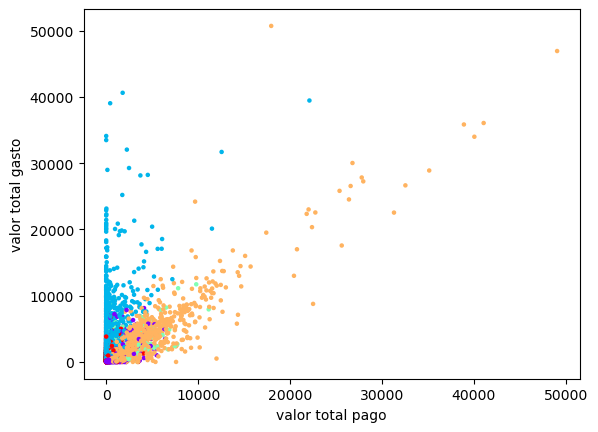

In [15]:
import matplotlib.pyplot as plt

plt.scatter(dataframe["PURCHASES"], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.show

In [19]:
import seaborn as sns
dataframe["cluster"] = labels
#sns.pairplot(dataframe[0:], hue="cluster")

In [21]:
dataframe.groupby("cluster").describe()

BALANCE                                                     \
          count         mean          std         min          25%   
cluster                                                              
0        3315.0   488.802028   936.433585    0.000000    24.078900   
1        1001.0  1748.854674  1987.975020    0.000000   486.170360   
2        1825.0  2949.582558  2565.494710  114.523682  1216.893766   
3        1494.0  1118.998658  1627.007380    0.000000   212.520398   
4        1315.0  2719.616192  2230.337145    1.691842  1035.647960   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          85.881798   448.965814   9630.367575            3315.0  0.780972   
1        1060.422892  2241.092286  14581.459140            1001.0  0.858535   
2        1843.308668  4021.881912  18495.558550            1825.0  0.996860   
3         543.237203  1337.212684  19043.138560            1494.0  0.931343   
4        2080.312991  3782.283750  12856.152510            1315.0  0.906890   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       260.172137   3933.230932           3315.0  0.244951   
1        ...       931.105425  21235.065300           1001.0  0.129974   
2        ...      1961.161822  76406.207520           1825.0  0.001062   
3        ...       531.787024  18621.013310           1494.0  0.282392   
4        ...      1164.174894   8644.138069           1315.0  0.007450   

                                                           
              std  min  25%       50%       75%       max  
cluster                                                    
0        0.345886  0.0  0.0  0.000000  0.436507  1.000000  
1        0.198876  0.0  0.0  0.083333  0.166667  1.000000  
2        0.013400  0.0  0.0  0.000000  0.000000  0.416667  
3        0.369194  0.0  0.0  0.083333  0.567461  1.000000  
4        0.041141  0.0  0.0  0.000000  0.000000  0.600000  

[5 rows x 128 columns]

In [22]:
centroids = kmeans.cluster_centers_
centroids

array([[7.41435057e-02, 2.30598606e-04, 1.22644337e-01, 4.91336388e-02,
        7.36112623e-02, 2.02012160e-02, 1.72105136e-04, 3.41056055e-05,
        1.39398511e-04, 7.56585643e-06, 1.18718703e-04, 2.87194118e-03,
        9.43090102e-01, 1.54954100e-01, 5.72048927e-02, 7.55013476e-05],
       [2.27283461e-01, 2.12919599e-04, 6.90552841e-02, 3.82103280e-02,
        3.08505405e-02, 3.64415621e-01, 5.84848743e-05, 2.24756747e-05,
        3.97948056e-05, 5.90776324e-05, 1.43098394e-03, 1.30916105e-03,
        5.19057140e-01, 6.31517578e-01, 1.13827521e-01, 3.10899781e-05],
       [5.34719561e-01, 3.07483975e-04, 9.40143076e-02, 4.50451970e-02,
        4.90841876e-02, 8.42618546e-02, 1.03569613e-04, 3.28730575e-05,
        7.70242320e-05, 3.86267235e-05, 6.70671828e-04, 2.24080860e-03,
        6.47510299e-01, 1.99941575e-01, 3.11248055e-01, 2.85575884e-07],
       [1.55441288e-01, 2.45527380e-04, 4.45197805e-01, 2.57865614e-01,
        1.87505775e-01, 2.67051319e-02, 2.04941957e-04, 8.809

In [28]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0276
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0219
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0037
CASH_ADVANCE 
0.0351
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0210
PAYMENTS 
0.0348
MINIMUM_PAYMENTS 
0.0078
PRC_FULL_PAYMENT 
0.0000


BALANCE 0.0224
PURCHASES 0.0196
CASH_ADVANCE 0.0226
CREDIT_LIMIT 0.0360
PAYMENTS 0.0280

In [34]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0         488.802028   640.242015    126.097601   5178.415315   827.711487   
1        1748.854674   531.250120   3064.439069   3914.956256  4961.223005   
2        2949.582558   559.479945    573.495675   3730.000000  1050.324877   
3        1118.998658  3328.438133    186.010928   4044.718977  3050.885706   
4        2719.616192   251.530144   3004.448265   4782.091255  1008.915227   

         n_clients  
cluster             
0             3315  
1             1001  
2             1825  
3             1494  
4             1315  


C:\Users\mayaram4rtins\AppData\Local\Temp\ipykernel_14140\2296433210.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
